# Ejercicio 1

Usar el conjunto de datos Arvertising y determinar los siguientes Modelos de regresión lineal

*   Sales = $\beta_0$ + $\beta_1 \times $ TV
*   Sales = $\beta_0$ + $\beta_1 \times $ Radio
*   Sales = $\beta_0$ + $\beta_1 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ TV $\times $ Radio

En cada caso, obtener el MSE y el MAE.

$$MSE=\frac{\displaystyle\sum_{i=1}^{N}(Y_{\text{real},i}-Y_{\text{pred},i})^{2}}{N}$$


$$MAE=\frac{\displaystyle\sum_{i=1}^{N}  |Y_{\text{real},i}-Y_{\text{pred},i}|}{N}$$


# Ejercicio 2

Usar el conjunto de datos Salary_dataset y determinar los modelos de regresión polinomial de la forma:


$$Salary = \beta_0 + \beta_1 \times  \text{YearsExperience} + \beta_2 \times  \text{YearsExperience}^{2}+ \cdots + \beta_P\text{YearsExperience}^{P} $$

Evaluar para cada $P=1,2,3,4,5$ y obtener el valor de $P$ más adeacuado en función del MSE y MAE.


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split


Advertising
Errores con datos de entrenamieto:

                                            Modelos        MSE       MAE
0                               Sales = β0 + β1× TV   5.000889  1.845259
1                            Sales = β0 + β1× Radio  25.331028  4.304425
2                        Sales = β0 + β1× Newspaper  27.432658  4.417994
3   Sales = β0 + β1× TV + β2× Radio + β3× Newspaper   2.486535  1.193656
4  Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio   2.214517  1.123276 



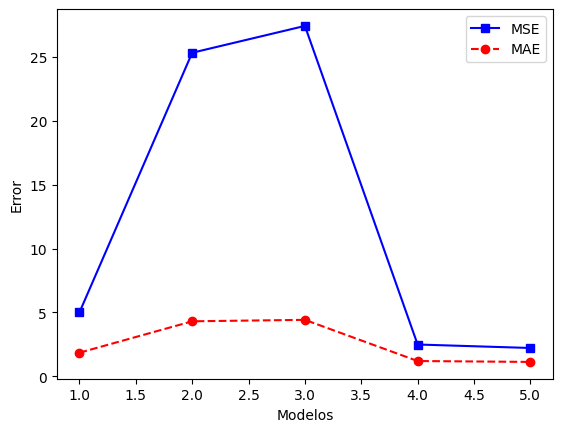

Advertising
Errores con datos de prueba:

                                            Modelos        MSE       MAE
0                               Sales = β0 + β1× TV   5.702364  1.788275
1                            Sales = β0 + β1× Radio  21.596587  3.966230
2                        Sales = β0 + β1× Newspaper  26.128948  4.205931
3   Sales = β0 + β1× TV + β2× Radio + β3× Newspaper   3.065467  1.342927
4  Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio   2.715906  1.325897 



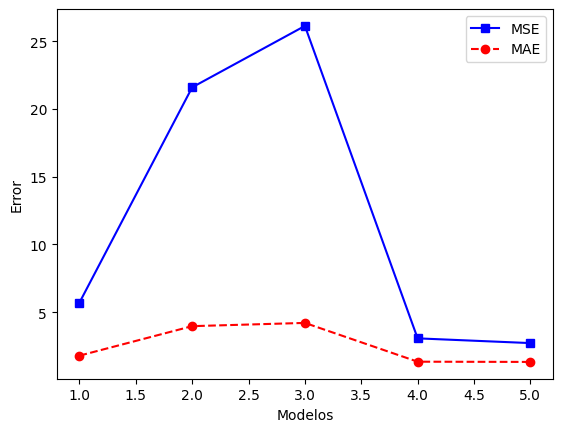

In [135]:
import pandas as pd
from google.colab import drive

np.random.seed(123)

df = pd.read_csv('/content/drive/My Drive/Actividad2_Mate/Advertising.csv', header=0)
Advert = df.to_numpy()

Advert_train, Advert_test = train_test_split(Advert, test_size=0.3)

Advert_train_N = len(Advert_train)
Advert_train_b = np.zeros([Advert_train_N,1])
for i in range (Advert_train_N):
  Advert_train_b[i][0]=Advert_train[i][3]

Advert_train_A1 = np.concatenate( [np.ones([Advert_train_N,1]),np.zeros([Advert_train_N,1])],axis=1) # Sales = β0 + β1× TV
for i in range (Advert_train_N):
  Advert_train_A1[i][1]=Advert_train[i][0]

Advert_train_A2 = np.concatenate( [np.ones([Advert_train_N,1]),np.zeros([Advert_train_N,1])],axis=1) # Sales = β0 + β1× Radio
for i in range (Advert_train_N):
  Advert_train_A2[i][1]=Advert_train[i][1]

Advert_train_A3 = np.concatenate( [np.ones([Advert_train_N,1]),np.zeros([Advert_train_N,1])],axis=1) # Sales = β0 + β1× Newspaper
for i in range (Advert_train_N):
  Advert_train_A3[i][1]=Advert_train[i][2]

Advert_train_A4 = np.concatenate( [np.ones([Advert_train_N,1]),np.zeros([Advert_train_N,3])],axis=1) # Sales = β0 + β1× TV + β2× Radio + β3× Newspaper
for i in range (Advert_train_N):
  Advert_train_A4[i][1]=Advert_train[i][0]
  Advert_train_A4[i][2]=Advert_train[i][1]
  Advert_train_A4[i][3]=Advert_train[i][2]

Advert_train_A5 = np.concatenate( [np.ones([Advert_train_N,1]),np.zeros([Advert_train_N,3])],axis=1) # Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio
for i in range (Advert_train_N):
  Advert_train_A5[i][1]=Advert_train[i][0]
  Advert_train_A5[i][2]=Advert_train[i][1]
  Advert_train_A5[i][3]=Advert_train[i][0]*Advert_train[i][1]

Advert_train_ATA1=transpose(Advert_train_A1) @ Advert_train_A1
Advert_train_ATB1=transpose(Advert_train_A1) @ Advert_train_b

Advert_train_ATA1 = Advert_train_ATA1.astype(np.float64)
Advert_train_ATB1 = Advert_train_ATB1.astype(np.float64)

X1=np.linalg.solve(Advert_train_ATA1, Advert_train_ATB1)    # Modelo 1

Advert_train_ATA2=transpose(Advert_train_A2) @ Advert_train_A2
Advert_train_ATB2=transpose(Advert_train_A2) @ Advert_train_b

Advert_train_ATA2 = Advert_train_ATA2.astype(np.float64)
Advert_train_ATB2 = Advert_train_ATB2.astype(np.float64)

X2=np.linalg.solve(Advert_train_ATA2, Advert_train_ATB2)    # Modelo 2

Advert_train_ATA3=transpose(Advert_train_A3) @ Advert_train_A3
Advert_train_ATB3=transpose(Advert_train_A3) @ Advert_train_b

Advert_train_ATA3 = Advert_train_ATA3.astype(np.float64)
Advert_train_ATB3 = Advert_train_ATB3.astype(np.float64)

X3=np.linalg.solve(Advert_train_ATA3, Advert_train_ATB3)    # Modelo 3

Advert_train_ATA4=transpose(Advert_train_A4) @ Advert_train_A4
Advert_train_ATB4=transpose(Advert_train_A4) @ Advert_train_b

Advert_train_ATA4 = Advert_train_ATA4.astype(np.float64)
Advert_train_ATB4 = Advert_train_ATB4.astype(np.float64)

X4=np.linalg.solve(Advert_train_ATA4, Advert_train_ATB4)    # Modelo 4

Advert_train_ATA5=transpose(Advert_train_A5) @ Advert_train_A5
Advert_train_ATB5=transpose(Advert_train_A5) @ Advert_train_b

Advert_train_ATA5 = Advert_train_ATA5.astype(np.float64)
Advert_train_ATB5 = Advert_train_ATB5.astype(np.float64)

X5=np.linalg.solve(Advert_train_ATA5, Advert_train_ATB5)    # Modelo 5

Advert_train_Y1=Advert_train_A1 @ X1

Advert_train_error1 = Advert_train_Y1 - Advert_train_b

Advert_train_MSE1 = np.mean(Advert_train_error1 ** 2)
Advert_train_MAE1 = np.mean(np.abs(Advert_train_error1))

Advert_train_Y2=Advert_train_A2 @ X2

Advert_train_error2 = Advert_train_Y2 - Advert_train_b

Advert_train_MSE2 = np.mean(Advert_train_error2 ** 2)
Advert_train_MAE2 = np.mean(np.abs(Advert_train_error2))

Advert_train_Y3=Advert_train_A3 @ X3

Advert_train_error3 = Advert_train_Y3 - Advert_train_b

Advert_train_MSE3 = np.mean(Advert_train_error3 ** 2)
Advert_train_MAE3 = np.mean(np.abs(Advert_train_error3))

Advert_train_Y4=Advert_train_A4 @ X4

Advert_train_error4 = Advert_train_Y4 - Advert_train_b

Advert_train_MSE4 = np.mean(Advert_train_error4 ** 2)
Advert_train_MAE4 = np.mean(np.abs(Advert_train_error4))

Advert_train_Y5=Advert_train_A5 @ X5

Advert_train_error5 = Advert_train_Y5 - Advert_train_b

Advert_train_MSE5 = np.mean(Advert_train_error5 ** 2)
Advert_train_MAE5 = np.mean(np.abs(Advert_train_error5))


Advert_train_tabla = {
    'Modelos': ['Sales = β0 + β1× TV', 'Sales = β0 + β1× Radio', 'Sales = β0 + β1× Newspaper', 'Sales = β0 + β1× TV + β2× Radio + β3× Newspaper', 'Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio'],
    'MSE': [Advert_train_MSE1, Advert_train_MSE2, Advert_train_MSE3, Advert_train_MSE4, Advert_train_MSE5],
    'MAE': [Advert_train_MAE1, Advert_train_MAE2, Advert_train_MAE3, Advert_train_MAE4, Advert_train_MAE5]
}

Advert_train_df = pd.DataFrame(Advert_train_tabla)

print('Advertising')
print('Errores con datos de entrenamieto:\n')
print(Advert_train_df,'\n')

plt.plot([1,2,3,4,5],[Advert_train_MSE1, Advert_train_MSE2, Advert_train_MSE3, Advert_train_MSE4, Advert_train_MSE5],'bs-',label='MSE')
plt.plot([1,2,3,4,5],[Advert_train_MAE1, Advert_train_MAE2, Advert_train_MAE3, Advert_train_MAE4, Advert_train_MAE5],'ro--',label='MAE')

plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend()
plt.show()

Advert_test_N = len(Advert_test)
Advert_test_b = np.zeros([Advert_test_N,1])
for i in range (Advert_test_N):
  Advert_test_b[i][0]=Advert_test[i][3]

Advert_test_A1 = np.concatenate( [np.ones([Advert_test_N,1]),np.zeros([Advert_test_N,1])],axis=1) # Sales = β0 + β1× TV
for i in range (Advert_test_N):
  Advert_test_A1[i][1]=Advert_test[i][0]

Advert_test_A2 = np.concatenate( [np.ones([Advert_test_N,1]),np.zeros([Advert_test_N,1])],axis=1) # Sales = β0 + β1× Radio
for i in range (Advert_test_N):
  Advert_test_A2[i][1]=Advert_test[i][1]

Advert_test_A3 = np.concatenate( [np.ones([Advert_test_N,1]),np.zeros([Advert_test_N,1])],axis=1) # Sales = β0 + β1× Newspaper
for i in range (Advert_test_N):
  Advert_test_A3[i][1]=Advert_test[i][2]

Advert_test_A4 = np.concatenate( [np.ones([Advert_test_N,1]),np.zeros([Advert_test_N,3])],axis=1) # Sales = β0 + β1× TV + β2× Radio + β3× Newspaper
for i in range (Advert_test_N):
  Advert_test_A4[i][1]=Advert_test[i][0]
  Advert_test_A4[i][2]=Advert_test[i][1]
  Advert_test_A4[i][3]=Advert_test[i][2]

Advert_test_A5 = np.concatenate( [np.ones([Advert_test_N,1]),np.zeros([Advert_test_N,3])],axis=1) # Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio
for i in range (Advert_test_N):
  Advert_test_A5[i][1]=Advert_test[i][0]
  Advert_test_A5[i][2]=Advert_test[i][1]
  Advert_test_A5[i][3]=Advert_test[i][0]*Advert_test[i][1]

Advert_test_ATA1=transpose(Advert_test_A1) @ Advert_test_A1
Advert_test_ATB1=transpose(Advert_test_A1) @ Advert_test_b

Advert_test_ATA1 = Advert_test_ATA1.astype(np.float64)
Advert_test_ATB1 = Advert_test_ATB1.astype(np.float64)

X1=np.linalg.solve(Advert_test_ATA1, Advert_test_ATB1)    # Modelo 1

Advert_test_ATA2=transpose(Advert_test_A2) @ Advert_test_A2
Advert_test_ATB2=transpose(Advert_test_A2) @ Advert_test_b

Advert_test_ATA2 = Advert_test_ATA2.astype(np.float64)
Advert_test_ATB2 = Advert_test_ATB2.astype(np.float64)

X2=np.linalg.solve(Advert_test_ATA2, Advert_test_ATB2)    # Modelo 2

Advert_test_ATA3=transpose(Advert_test_A3) @ Advert_test_A3
Advert_test_ATB3=transpose(Advert_test_A3) @ Advert_test_b

Advert_test_ATA3 = Advert_test_ATA3.astype(np.float64)
Advert_test_ATB3 = Advert_test_ATB3.astype(np.float64)

X3=np.linalg.solve(Advert_test_ATA3, Advert_test_ATB3)    # Modelo 3

Advert_test_ATA4=transpose(Advert_test_A4) @ Advert_test_A4
Advert_test_ATB4=transpose(Advert_test_A4) @ Advert_test_b

Advert_test_ATA4 = Advert_test_ATA4.astype(np.float64)
Advert_test_ATB4 = Advert_test_ATB4.astype(np.float64)

X4=np.linalg.solve(Advert_test_ATA4, Advert_test_ATB4)    # Modelo 4

Advert_test_ATA5=transpose(Advert_test_A5) @ Advert_test_A5
Advert_test_ATB5=transpose(Advert_test_A5) @ Advert_test_b

Advert_test_ATA5 = Advert_test_ATA5.astype(np.float64)
Advert_test_ATB5 = Advert_test_ATB5.astype(np.float64)

X5=np.linalg.solve(Advert_test_ATA5, Advert_test_ATB5)    # Modelo 5

Advert_test_Y1=Advert_test_A1 @ X1

Advert_test_error1 = Advert_test_Y1 - Advert_test_b

Advert_test_MSE1 = np.mean(Advert_test_error1 ** 2)
Advert_test_MAE1 = np.mean(np.abs(Advert_test_error1))

Advert_test_Y2=Advert_test_A2 @ X2

Advert_test_error2 = Advert_test_Y2 - Advert_test_b

Advert_test_MSE2 = np.mean(Advert_test_error2 ** 2)
Advert_test_MAE2 = np.mean(np.abs(Advert_test_error2))

Advert_test_Y3=Advert_test_A3 @ X3

Advert_test_error3 = Advert_test_Y3 - Advert_test_b

Advert_test_MSE3 = np.mean(Advert_test_error3 ** 2)
Advert_test_MAE3 = np.mean(np.abs(Advert_test_error3))

Advert_test_Y4=Advert_test_A4 @ X4

Advert_test_error4 = Advert_test_Y4 - Advert_test_b

Advert_test_MSE4 = np.mean(Advert_test_error4 ** 2)
Advert_test_MAE4 = np.mean(np.abs(Advert_test_error4))

Advert_test_Y5=Advert_test_A5 @ X5

Advert_test_error5 = Advert_test_Y5 - Advert_test_b

Advert_test_MSE5 = np.mean(Advert_test_error5 ** 2)
Advert_test_MAE5 = np.mean(np.abs(Advert_test_error5))


Advert_test_tabla = {
    'Modelos': ['Sales = β0 + β1× TV', 'Sales = β0 + β1× Radio', 'Sales = β0 + β1× Newspaper', 'Sales = β0 + β1× TV + β2× Radio + β3× Newspaper', 'Sales = β0 + β1× TV + β2× Radio + β3× TV × Radio'],
    'MSE': [Advert_test_MSE1, Advert_test_MSE2, Advert_test_MSE3, Advert_test_MSE4, Advert_test_MSE5],
    'MAE': [Advert_test_MAE1, Advert_test_MAE2, Advert_test_MAE3, Advert_test_MAE4, Advert_test_MAE5]
}

Advert_test_df = pd.DataFrame(Advert_test_tabla)

print('Advertising')
print('Errores con datos de prueba:\n')
print(Advert_test_df,'\n')

plt.plot([1,2,3,4,5],[Advert_test_MSE1, Advert_test_MSE2, Advert_test_MSE3, Advert_test_MSE4, Advert_test_MSE5],'bs-',label='MSE')
plt.plot([1,2,3,4,5],[Advert_test_MAE1, Advert_test_MAE2, Advert_test_MAE3, Advert_test_MAE4, Advert_test_MAE5],'ro--',label='MAE')

plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend()
plt.show()


Salary dataset
Errores con datos de entrenamieto:

  Modelos           MSE          MAE
0     P=1  3.275622e+07  4630.198978
1     P=2  3.246912e+07  4637.426813
2     P=3  2.698745e+07  4324.929091
3     P=4  2.629552e+07  4251.602456
4     P=5  2.486055e+07  4223.958257 



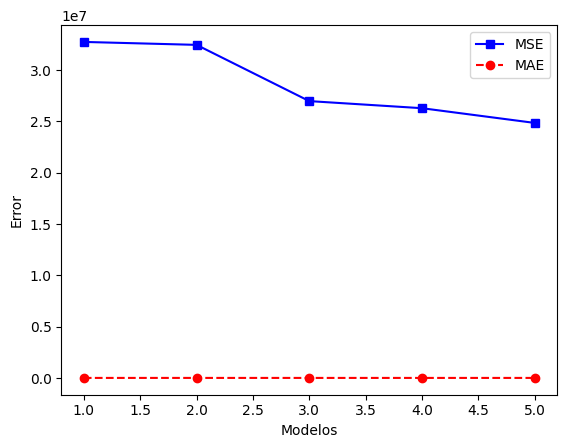

Salary dataset
Errores con datos de prueba:

  Modelos           MSE          MAE
0     P=1  2.662246e+07  4511.957398
1     P=2  2.662132e+07  4506.384630
2     P=3  1.559870e+07  3391.772000
3     P=4  9.718913e+06  2322.233611
4     P=5  6.444515e+06  1707.076032 



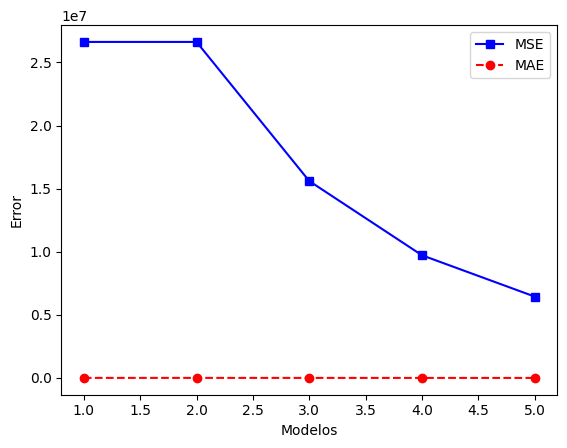

In [134]:
import pandas as pd
from google.colab import drive

np.random.seed(123)

df = pd.read_csv('/content/drive/My Drive/Actividad2_Mate/Salary_dataset.csv', header=0)
Salary = df.to_numpy()

Salary_train, Salary_test = train_test_split(Salary, test_size=0.3)

Salary_train_N = len(Salary_train)
Salary_train_b = np.zeros([Salary_train_N,1])
for i in range (Salary_train_N):
  Salary_train_b[i][0]=Salary_train[i][2]

Salary_train_A1 = np.concatenate( [np.ones([Salary_train_N,1]),np.zeros([Salary_train_N,1])],axis=1) # Salary=β0+β1×YearsExperience
for i in range (Salary_train_N):
  Salary_train_A1[i][1]=Salary_train[i][1]

Salary_train_A2 = np.concatenate( [np.ones([Salary_train_N,1]),np.zeros([Salary_train_N,2])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2
for i in range (Salary_train_N):
  Salary_train_A2[i][1]=Salary_train[i][1]
  Salary_train_A2[i][2]=Salary_train[i][1]**2

Salary_train_A3 = np.concatenate( [np.ones([Salary_train_N,1]),np.zeros([Salary_train_N,3])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3
for i in range (Salary_train_N):
  Salary_train_A3[i][1]=Salary_train[i][1]
  Salary_train_A3[i][2]=Salary_train[i][1]**2
  Salary_train_A3[i][3]=Salary_train[i][1]**3

Salary_train_A4 = np.concatenate( [np.ones([Salary_train_N,1]),np.zeros([Salary_train_N,4])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3+β4×YearsExperience^4
for i in range (Salary_train_N):
  Salary_train_A4[i][1]=Salary_train[i][1]
  Salary_train_A4[i][2]=Salary_train[i][1]**2
  Salary_train_A4[i][3]=Salary_train[i][1]**3
  Salary_train_A4[i][4]=Salary_train[i][1]**4

Salary_train_A5 = np.concatenate( [np.ones([Salary_train_N,1]),np.zeros([Salary_train_N,5])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3+β4×YearsExperience^4+β5×YearsExperience^5
for i in range (Salary_train_N):
  Salary_train_A5[i][1]=Salary_train[i][1]
  Salary_train_A5[i][2]=Salary_train[i][1]**2
  Salary_train_A5[i][3]=Salary_train[i][1]**3
  Salary_train_A5[i][4]=Salary_train[i][1]**4
  Salary_train_A5[i][5]=Salary_train[i][1]**5

Salary_train_ATA1=transpose(Salary_train_A1) @ Salary_train_A1
Salary_train_ATB1=transpose(Salary_train_A1) @ Salary_train_b

Salary_train_ATA1 = Salary_train_ATA1.astype(np.float64)
Salary_train_ATB1 = Salary_train_ATB1.astype(np.float64)

X1=np.linalg.solve(Salary_train_ATA1, Salary_train_ATB1)    # Modelo 1

Salary_train_ATA2=transpose(Salary_train_A2) @ Salary_train_A2
Salary_train_ATB2=transpose(Salary_train_A2) @ Salary_train_b

Salary_train_ATA2 = Salary_train_ATA2.astype(np.float64)
Salary_train_ATB2 = Salary_train_ATB2.astype(np.float64)

X2=np.linalg.solve(Salary_train_ATA2, Salary_train_ATB2)    # Modelo 2

Salary_train_ATA3=transpose(Salary_train_A3) @ Salary_train_A3
Salary_train_ATB3=transpose(Salary_train_A3) @ Salary_train_b

Salary_train_ATA3 = Salary_train_ATA3.astype(np.float64)
Salary_train_ATB3 = Salary_train_ATB3.astype(np.float64)

X3=np.linalg.solve(Salary_train_ATA3, Salary_train_ATB3)    # Modelo 3

Salary_train_ATA4=transpose(Salary_train_A4) @ Salary_train_A4
Salary_train_ATB4=transpose(Salary_train_A4) @ Salary_train_b

Salary_train_ATA4 = Salary_train_ATA4.astype(np.float64)
Salary_train_ATB4 = Salary_train_ATB4.astype(np.float64)

X4=np.linalg.solve(Salary_train_ATA4, Salary_train_ATB4)    # Modelo 4

Salary_train_ATA5=transpose(Salary_train_A5) @ Salary_train_A5
Salary_train_ATB5=transpose(Salary_train_A5) @ Salary_train_b

Salary_train_ATA5 = Salary_train_ATA5.astype(np.float64)
Salary_train_ATB5 = Salary_train_ATB5.astype(np.float64)

X5=np.linalg.solve(Salary_train_ATA5, Salary_train_ATB5)    # Modelo 5

Salary_train_Y1=Salary_train_A1 @ X1

Salary_train_error1 = Salary_train_Y1 - Salary_train_b

Salary_train_MSE1 = np.mean(Salary_train_error1 ** 2)
Salary_train_MAE1 = np.mean(np.abs(Salary_train_error1))

Salary_train_Y2=Salary_train_A2 @ X2

Salary_train_error2 = Salary_train_Y2 - Salary_train_b

Salary_train_MSE2 = np.mean(Salary_train_error2 ** 2)
Salary_train_MAE2 = np.mean(np.abs(Salary_train_error2))

Salary_train_Y3=Salary_train_A3 @ X3

Salary_train_error3 = Salary_train_Y3 - Salary_train_b

Salary_train_MSE3 = np.mean(Salary_train_error3 ** 2)
Salary_train_MAE3 = np.mean(np.abs(Salary_train_error3))

Salary_train_Y4=Salary_train_A4 @ X4

Salary_train_error4 = Salary_train_Y4 - Salary_train_b

Salary_train_MSE4 = np.mean(Salary_train_error4 ** 2)
Salary_train_MAE4 = np.mean(np.abs(Salary_train_error4))

Salary_train_Y5=Salary_train_A5 @ X5

Salary_train_error5 = Salary_train_Y5 - Salary_train_b

Salary_train_MSE5 = np.mean(Salary_train_error5 ** 2)
Salary_train_MAE5 = np.mean(np.abs(Salary_train_error5))


Salary_train_tabla = {
    'Modelos': ['P=1', 'P=2', 'P=3', 'P=4', 'P=5'],
    'MSE': [Salary_train_MSE1, Salary_train_MSE2, Salary_train_MSE3, Salary_train_MSE4, Salary_train_MSE5],
    'MAE': [Salary_train_MAE1, Salary_train_MAE2, Salary_train_MAE3, Salary_train_MAE4, Salary_train_MAE5]
}

Salary_train_df = pd.DataFrame(Salary_train_tabla)

print('Salary dataset')
print('Errores con datos de entrenamieto:\n')
print(Salary_train_df,'\n')

plt.plot([1,2,3,4,5],[Salary_train_MSE1, Salary_train_MSE2, Salary_train_MSE3, Salary_train_MSE4, Salary_train_MSE5],'bs-',label='MSE')
plt.plot([1,2,3,4,5],[Salary_train_MAE1, Salary_train_MAE2, Salary_train_MAE3, Salary_train_MAE4, Salary_train_MAE5],'ro--',label='MAE')

plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend()
plt.show()

Salary_test_N = len(Salary_test)
Salary_test_b = np.zeros([Salary_test_N,1])
for i in range (Salary_test_N):
  Salary_test_b[i][0]=Salary_test[i][2]

Salary_test_A1 = np.concatenate( [np.ones([Salary_test_N,1]),np.zeros([Salary_test_N,1])],axis=1) # Salary=β0+β1×YearsExperience
for i in range (Salary_test_N):
  Salary_test_A1[i][1]=Salary_test[i][1]

Salary_test_A2 = np.concatenate( [np.ones([Salary_test_N,1]),np.zeros([Salary_test_N,2])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2
for i in range (Salary_test_N):
  Salary_test_A2[i][1]=Salary_test[i][1]
  Salary_test_A2[i][2]=Salary_test[i][1]**2

Salary_test_A3 = np.concatenate( [np.ones([Salary_test_N,1]),np.zeros([Salary_test_N,3])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3
for i in range (Salary_test_N):
  Salary_test_A3[i][1]=Salary_test[i][1]
  Salary_test_A3[i][2]=Salary_test[i][1]**2
  Salary_test_A3[i][3]=Salary_test[i][1]**3

Salary_test_A4 = np.concatenate( [np.ones([Salary_test_N,1]),np.zeros([Salary_test_N,4])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3+β4×YearsExperience^4
for i in range (Salary_test_N):
  Salary_test_A4[i][1]=Salary_test[i][1]
  Salary_test_A4[i][2]=Salary_test[i][1]**2
  Salary_test_A4[i][3]=Salary_test[i][1]**3
  Salary_test_A4[i][4]=Salary_test[i][1]**4

Salary_test_A5 = np.concatenate( [np.ones([Salary_test_N,1]),np.zeros([Salary_test_N,5])],axis=1) # Salary=β0+β1×YearsExperience+β2×YearsExperience^2+β3×YearsExperience^3+β4×YearsExperience^4+β5×YearsExperience^5
for i in range (Salary_test_N):
  Salary_test_A5[i][1]=Salary_test[i][1]
  Salary_test_A5[i][2]=Salary_test[i][1]**2
  Salary_test_A5[i][3]=Salary_test[i][1]**3
  Salary_test_A5[i][4]=Salary_test[i][1]**4
  Salary_test_A5[i][5]=Salary_test[i][1]**5

Salary_test_ATA1=transpose(Salary_test_A1) @ Salary_test_A1
Salary_test_ATB1=transpose(Salary_test_A1) @ Salary_test_b

Salary_test_ATA1 = Salary_test_ATA1.astype(np.float64)
Salary_test_ATB1 = Salary_test_ATB1.astype(np.float64)

X1=np.linalg.solve(Salary_test_ATA1, Salary_test_ATB1)    # Modelo 1

Salary_test_ATA2=transpose(Salary_test_A2) @ Salary_test_A2
Salary_test_ATB2=transpose(Salary_test_A2) @ Salary_test_b

Salary_test_ATA2 = Salary_test_ATA2.astype(np.float64)
Salary_test_ATB2 = Salary_test_ATB2.astype(np.float64)

X2=np.linalg.solve(Salary_test_ATA2, Salary_test_ATB2)    # Modelo 2

Salary_test_ATA3=transpose(Salary_test_A3) @ Salary_test_A3
Salary_test_ATB3=transpose(Salary_test_A3) @ Salary_test_b

Salary_test_ATA3 = Salary_test_ATA3.astype(np.float64)
Salary_test_ATB3 = Salary_test_ATB3.astype(np.float64)

X3=np.linalg.solve(Salary_test_ATA3, Salary_test_ATB3)    # Modelo 3

Salary_test_ATA4=transpose(Salary_test_A4) @ Salary_test_A4
Salary_test_ATB4=transpose(Salary_test_A4) @ Salary_test_b

Salary_test_ATA4 = Salary_test_ATA4.astype(np.float64)
Salary_test_ATB4 = Salary_test_ATB4.astype(np.float64)

X4=np.linalg.solve(Salary_test_ATA4, Salary_test_ATB4)    # Modelo 4

Salary_test_ATA5=transpose(Salary_test_A5) @ Salary_test_A5
Salary_test_ATB5=transpose(Salary_test_A5) @ Salary_test_b

Salary_test_ATA5 = Salary_test_ATA5.astype(np.float64)
Salary_test_ATB5 = Salary_test_ATB5.astype(np.float64)

X5=np.linalg.solve(Salary_test_ATA5, Salary_test_ATB5)    # Modelo 5

Salary_test_Y1=Salary_test_A1 @ X1

Salary_test_error1 = Salary_test_Y1 - Salary_test_b

Salary_test_MSE1 = np.mean(Salary_test_error1 ** 2)
Salary_test_MAE1 = np.mean(np.abs(Salary_test_error1))

Salary_test_Y2=Salary_test_A2 @ X2

Salary_test_error2 = Salary_test_Y2 - Salary_test_b

Salary_test_MSE2 = np.mean(Salary_test_error2 ** 2)
Salary_test_MAE2 = np.mean(np.abs(Salary_test_error2))

Salary_test_Y3=Salary_test_A3 @ X3

Salary_test_error3 = Salary_test_Y3 - Salary_test_b

Salary_test_MSE3 = np.mean(Salary_test_error3 ** 2)
Salary_test_MAE3 = np.mean(np.abs(Salary_test_error3))

Salary_test_Y4=Salary_test_A4 @ X4

Salary_test_error4 = Salary_test_Y4 - Salary_test_b

Salary_test_MSE4 = np.mean(Salary_test_error4 ** 2)
Salary_test_MAE4 = np.mean(np.abs(Salary_test_error4))

Salary_test_Y5=Salary_test_A5 @ X5

Salary_test_error5 = Salary_test_Y5 - Salary_test_b

Salary_test_MSE5 = np.mean(Salary_test_error5 ** 2)
Salary_test_MAE5 = np.mean(np.abs(Salary_test_error5))

Salary_test_tabla = {
    'Modelos': ['P=1', 'P=2', 'P=3', 'P=4', 'P=5'],
    'MSE': [Salary_test_MSE1, Salary_test_MSE2, Salary_test_MSE3, Salary_test_MSE4, Salary_test_MSE5],
    'MAE': [Salary_test_MAE1, Salary_test_MAE2, Salary_test_MAE3, Salary_test_MAE4, Salary_test_MAE5]
}

Salary_test_df = pd.DataFrame(Salary_test_tabla)

print('Salary dataset')
print('Errores con datos de prueba:\n')
print(Salary_test_df,'\n')

plt.plot([1,2,3,4,5],[Salary_test_MSE1, Salary_test_MSE2, Salary_test_MSE3, Salary_test_MSE4, Salary_test_MSE5],'bs-',label='MSE')
plt.plot([1,2,3,4,5],[Salary_test_MAE1, Salary_test_MAE2, Salary_test_MAE3, Salary_test_MAE4, Salary_test_MAE5],'ro--',label='MAE')

plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend()
plt.show()
